# Task 1.1 Data Understanding
*Alberto Roberto Marinelli, Giacomo Cignoni, Alessandro Bucci*
## Importing Libraries
First we import the libraries necessary to analyze the data

In [160]:
import math
import sys
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import decomposition

In [161]:
pd.set_option('mode.use_inf_as_na', True)

def mr_bins(number_of_samples):
    return (np.log2(number_of_samples)).astype('int64') + 1


Then we load the datasets

In [162]:
df_tweets_sample = pd.read_csv('../dataset/tweets_sample.csv', sep=',', index_col=0)  # load tweets
df_users = pd.read_csv('../dataset/users.csv', sep=',', index_col=0)  # load users

In [163]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [164]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         134464 non-null  object
 1   retweet_count   132232 non-null  object
 2   reply_count     130163 non-null  object
 3   favorite_count  130128 non-null  object
 4   num_hashtags    126020 non-null  object
 5   num_urls        130145 non-null  object
 6   num_mentions    128069 non-null  object
 7   created_at      136647 non-null  object
 8   text            131286 non-null  object
dtypes: object(9)
memory usage: 10.4+ MB


In [165]:
df_tweets_sample

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
528578456452612097,567430901,0,0,0,0,0,0,2019-11-03 16:04:59,"La sera, a letto.Lui:- FarÃ² di te la donna pi..."
492852780101406721,277506943,0,0,2,1,0,0,2019-07-28 02:03:54,#RFGoNaked http://t.co/eaf1sO4TWL
888885286917605,317296274,0,dcl83oci,NaN,NaN,NaN,NaN,2020-03-21 17:43:22,Volunteers report 100% retail tobacco complian...
516101108960206848,1372026204,0,0,0,4,1,0,2019-09-30 05:44:27,What HR Lessons Did I Learn Whilst Managing Me...
528187250392461312,468101494,0,0,0,0,0,0,2019-11-02 14:10:28,"-Cara, ti voglio POSSEDERE dove non te ti ha m..."
...,...,...,...,...,...,...,...,...,...
500184073814700033,576148031,0,0,0,0,0,0,2019-08-17 07:35:50,"Porta bene Renzi! Grazie ""presidente"""
578072909085724672,25693756,0,0,0,0,0,1,2020-03-19 05:58:16,@malakhstudios You OK?
588013533557841920,2395918790,0,0,0,0,0,0,2020-04-15 16:18:45,"If there is Jacob Whiteside, there is also Jac..."


## Features informations
"Type" indicates the wanted feature Datatype for conversion in "Casting" section

### Users dataset
id, name, lang, bot, created_at and statuses_count
* **id** (*Numerical*)
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer.
* **name** (*Categorical*)
  * Type: **String**
  * Description: The name of the user.
* **lang** (*Categorical*)
  * Type: **String**
  * Description: The user’s language selected
* **bot** (*Numerical*)
  * Type: **Boolean**
  * Description: A binary variable that indicates if a user is a bot or a genuine user
* **created_at** (*Numerical*)
  * Type: **Datetime64**
  * Description: The timestamp of when the user was created
* **statuses_count** (*Numerical*)
  * Type: **Int64**
  * Description: The count of the tweets made by the user at the moment of data crawling.
### Tweets dataset
* **id** (*Numerical*)
  * Type: **Object**
  * Description: Is the identifier of the single tweet, it should be int64, but we decided to consder it object because it does not affect the data if it is not an integer.
* **user_id** (*Numerical*)
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer
* **retweet_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of retweets of the single tweet
* **reply_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of replies of the single tweet
* **favorite_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of favorites (or likes) of the single tweet
* **num_hashtags** (*Numerical*)
  * Type: **Int64**
  * Description: The number of hashtags in the single tweet
* **num_urls** (*Numerical*)
  * Type: **Int64**
  * Description: The number of urls in the single tweet
* **num_mentions** (*Numerical*)
  * Type: **Int64**
  * Description: The number of mentions in the single tweet
* **created_at** (*Numerical*)
  * Type: **Datetime64**
  * Description: The timestamp of when the single tweet was created
* **text** (*Categorical*)
  * Type: **String**
  * Description: The text of the single tweet

## Datatype Casting
### Users dataframe casting

In [166]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


Cast name and lang columns to string and created_at to DateTime in df_users

In [167]:
df_users.name = df_users.name.astype('string')
df_users.lang = df_users.lang.astype('string')

Cast statuses_count to Int64, bot to bool and created_at to DateTime in df_users

In [168]:
df_users.statuses_count = df_users.statuses_count.astype('Int64', errors='raise')
df_users.bot = df_users.bot.astype('bool', errors='raise')
df_users.created_at = pd.to_datetime(df_users.created_at, errors='coerce')


In [169]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            11507 non-null  string        
 1   lang            11508 non-null  string        
 2   bot             11508 non-null  bool          
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11109 non-null  Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), string(2)
memory usage: 472.0 KB


### Tweets dataframe casting

In [170]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         134464 non-null  object
 1   retweet_count   132232 non-null  object
 2   reply_count     130163 non-null  object
 3   favorite_count  130128 non-null  object
 4   num_hashtags    126020 non-null  object
 5   num_urls        130145 non-null  object
 6   num_mentions    128069 non-null  object
 7   created_at      136647 non-null  object
 8   text            131286 non-null  object
dtypes: object(9)
memory usage: 10.4+ MB


Int64 casting for numeric columns in df_tweets

In [171]:
def cast_int(x):
    try:
        return np.int64(x)
    except:
        return pd.NA
    

for col_name in df_tweets_sample.iloc[:, : 7]:
    # Cast objects to float. after this instruction the column becomes numerics
    df_tweets_sample[col_name] = pd.to_numeric(df_tweets_sample[col_name], downcast= 'float', errors='coerce')

    # Substitute values outside of Int64 limits with NaN
    df_tweets_sample[col_name] = df_tweets_sample[col_name].apply(cast_int)

    # Cast to Int64
    df_tweets_sample[col_name] = df_tweets_sample[col_name].astype('Int64', errors='raise')



Cast text column to string and created_at to DateTime in df_tweets

In [172]:
df_tweets_sample.text = df_tweets_sample.text.astype('string')
df_tweets_sample.created_at = pd.to_datetime(
    df_tweets_sample.created_at, errors='coerce') #The invalid dates are set to NaT

In [173]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         132272 non-null  Int64         
 1   retweet_count   130362 non-null  Int64         
 2   reply_count     128457 non-null  Int64         
 3   favorite_count  128519 non-null  Int64         
 4   num_hashtags    124949 non-null  Int64         
 5   num_urls        128514 non-null  Int64         
 6   num_mentions    126737 non-null  Int64         
 7   created_at      136647 non-null  datetime64[ns]
 8   text            131286 non-null  string        
dtypes: Int64(7), datetime64[ns](1), string(1)
memory usage: 11.3+ MB


## Attributes exploration and outliers fixing

We now explore the distributions in order to find the outliers of each attribute.

### User dataset attributes exploration and outliers fixing

We check 'created_at' whit a bar plot by year.

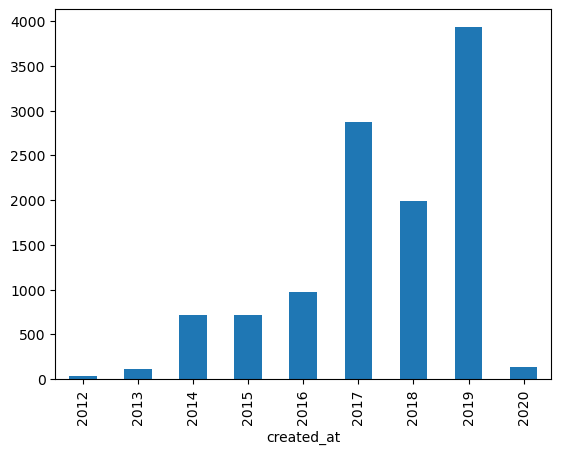

In [174]:
df_users.created_at.groupby(df_users.created_at.dt.year).count().plot(kind='bar')
plt.show()

Since Twitter was founded in 2006 and the oldest user is from 2012, there are no lower bound outliers.

Since the crawling was done in 2020, and there are no users created later than 2020, there are no upper bound outliers.

Now we check **'lang'**.

Showing how 'lang' is composed with a logarithmic scale bar plot

Langs in the user dataset:


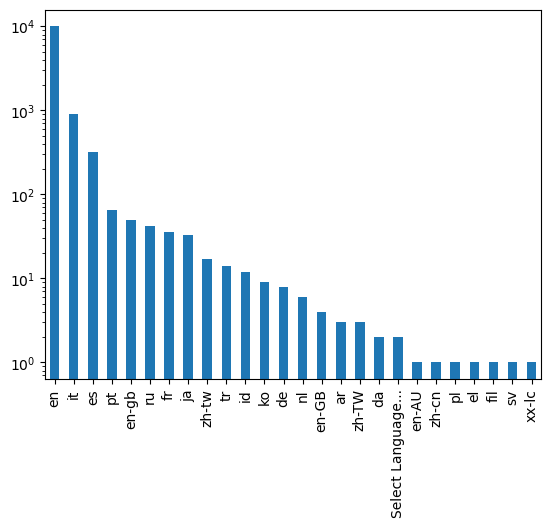

In [175]:
lang_distribution = df_users.lang.value_counts()
print('Langs in the user dataset:')
#print(lang_distribution)

lang_distribution.plot(kind="bar")
plt.yscale('log')
plt.show()

We decided that if the lang contains a dash, we'll take into consideration only the lang before it.

E.g.: "en-gb" will become "en", "zh-tw" will become "zh".

In [187]:
import re

def lang_correction(lang_string):
    lang = lang_string
    lang = re.sub('-.*$', '', lang)

    return lang

df_users.lang = df_users.lang.apply(lang_correction).astype('string')


The two only invalid values are "Select Language..." and "xx". We can manage them directly

Substituting "Select Language..." with the mode. 

In [188]:
df_users.lang.replace(to_replace="Select Language...",value=df_users.lang.mode()[0], inplace=True)

We looked at the tweets with the user id equal to the one who has 'lang' equal to xx, and determined that theier posts were english, so we changed 'lang' to 'en', which is also the mode.

In [189]:
df_users.lang.replace(to_replace="xx",value=df_users.lang.mode()[0], inplace=True)

Now we show the cleaned 'lang' distribution.

Langs in the user dataset:


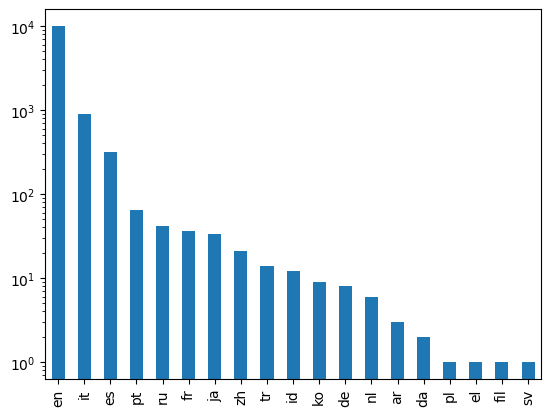

In [191]:
lang_distribution = df_users.lang.value_counts()
print('Langs in the user dataset:')
lang_distribution.plot(kind="bar")
plt.yscale('log')
plt.show()

Now we check **"statuses_count"**

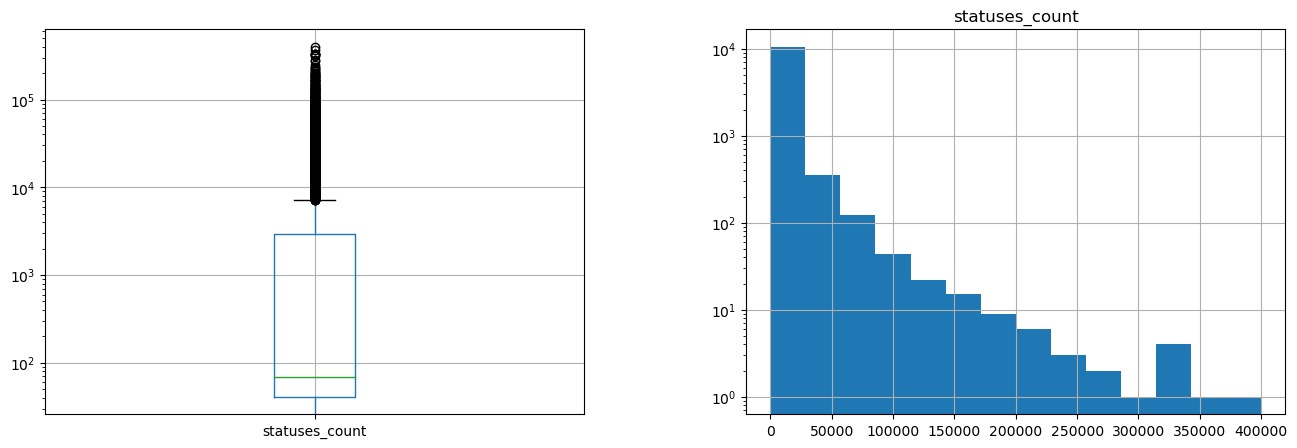

In [192]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_users.boxplot(column="statuses_count", ax=ax1)
ax1.set_yscale('log')
df_users.hist(column="statuses_count", ax=ax2, stacked=True, bins=mr_bins(df_users.statuses_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()


There are no outliers, because there is no user that violate limit of 5 * 10^7 tweets and also there are not negative values that would be invalid.

### Tweets dataset attributes exploration and outliers fixing

We check **"retweet_count"** attribute

The most retweet tweet ever has more than 4*10^6 retweets, so we not consider a retweet count over that threshold (we set them to NaN)

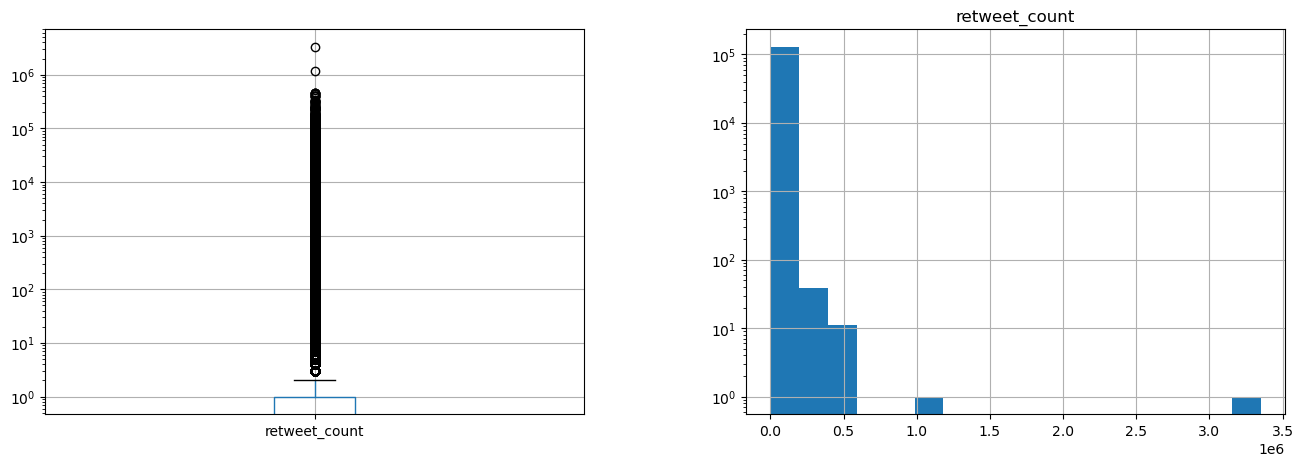

In [193]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="retweet_count", ax=ax1)
ax1.set_yscale('log')
df_tweets_sample.hist(column="retweet_count", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.retweet_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

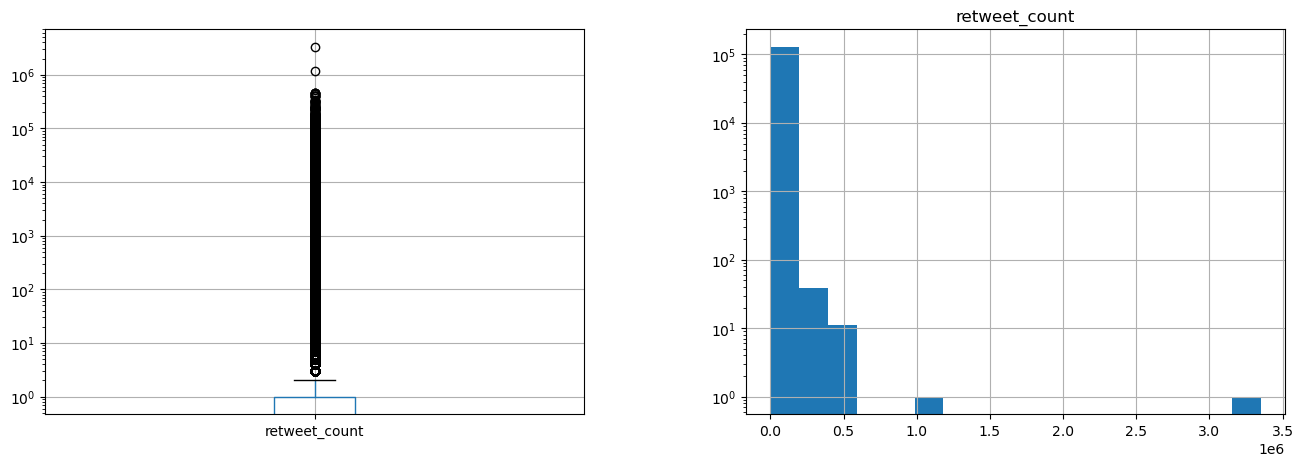

In [194]:
max_retweets = 4*(10**6)
df_tweets_sample.retweet_count = df_tweets_sample.retweet_count.apply(
    lambda x: x if not pd.isna(x) and x < max_retweets and x >= 0 else pd.NA)
df_tweets_sample.retweet_count = df_tweets_sample.retweet_count.astype("Int64")

# Then we display the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="retweet_count", ax=ax1)
ax1.set_yscale('log')
df_tweets_sample.hist(column="retweet_count", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.retweet_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

Now we check **'reply_count'** attribute.

The most replied tweet can't be much more replies than the highest number of replies, so we limit also the number of replies to 4*10^6

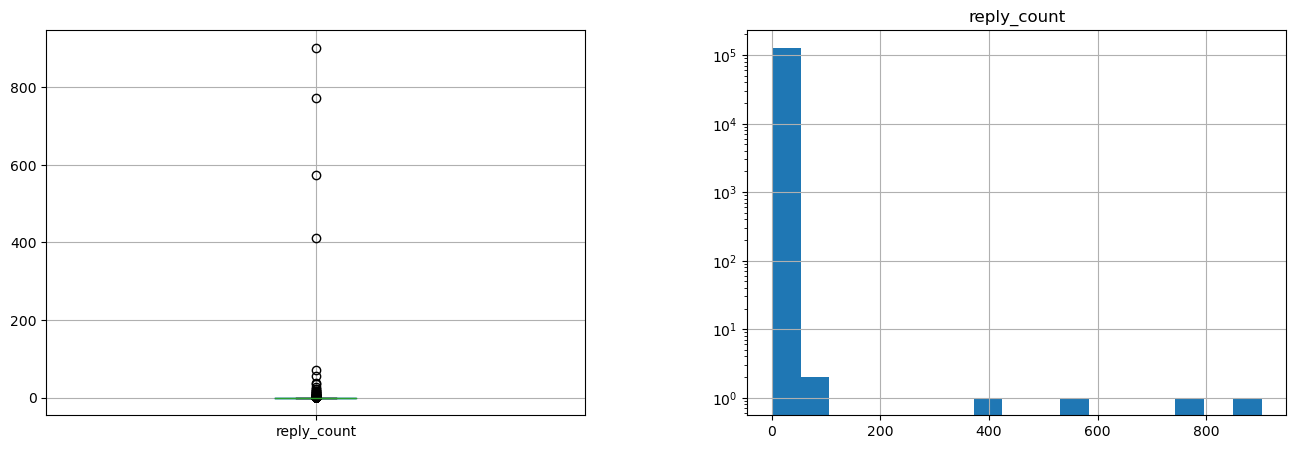

In [195]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="reply_count", ax=ax1)
#ax1.set_yscale('log')
df_tweets_sample.hist(column="reply_count", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.reply_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

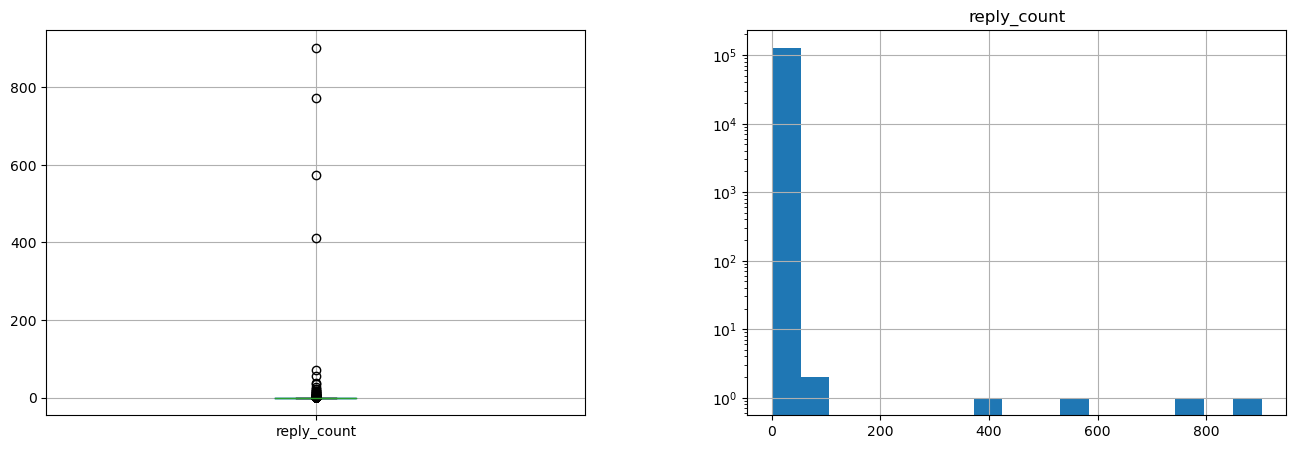

In [196]:
max_replies = 4*(10**6)
df_tweets_sample.reply_count = df_tweets_sample.reply_count.apply(
    lambda x: x if not pd.isna(x) and x < max_replies and x >= 0 else x)
df_tweets_sample.reply_count = df_tweets_sample.reply_count.astype("Int64")

# Then we display the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="reply_count", ax=ax1)
#ax1.set_yscale('log')
df_tweets_sample.hist(column="reply_count", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.reply_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

Now we check **'favorite_count'** attribute

The most liked tweets has 7*10^6 likes, so we should limit the number of likes to that threshold

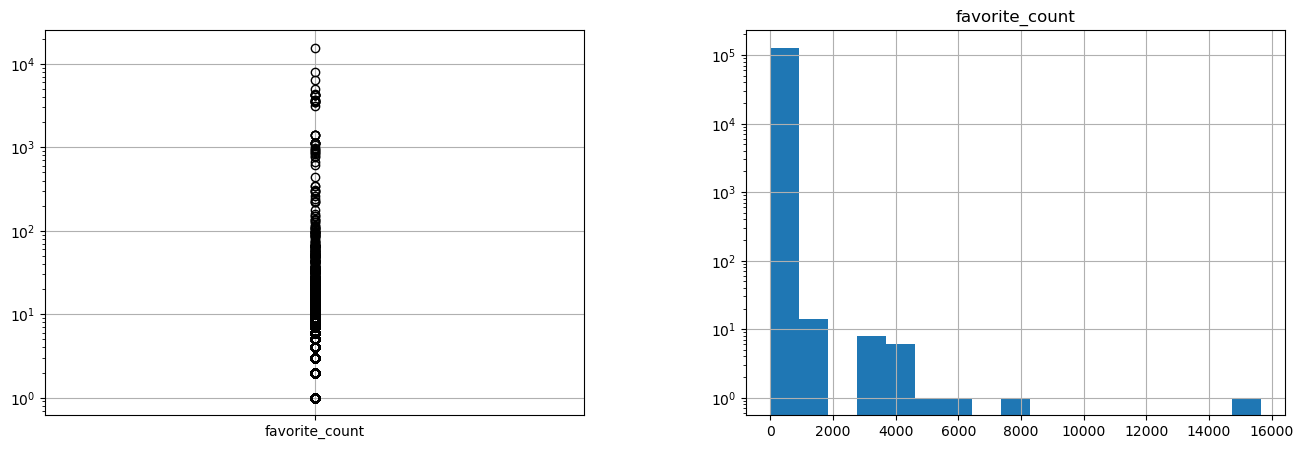

In [197]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="favorite_count", ax=ax1)
ax1.set_yscale('log')
df_tweets_sample.hist(column="favorite_count", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.favorite_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

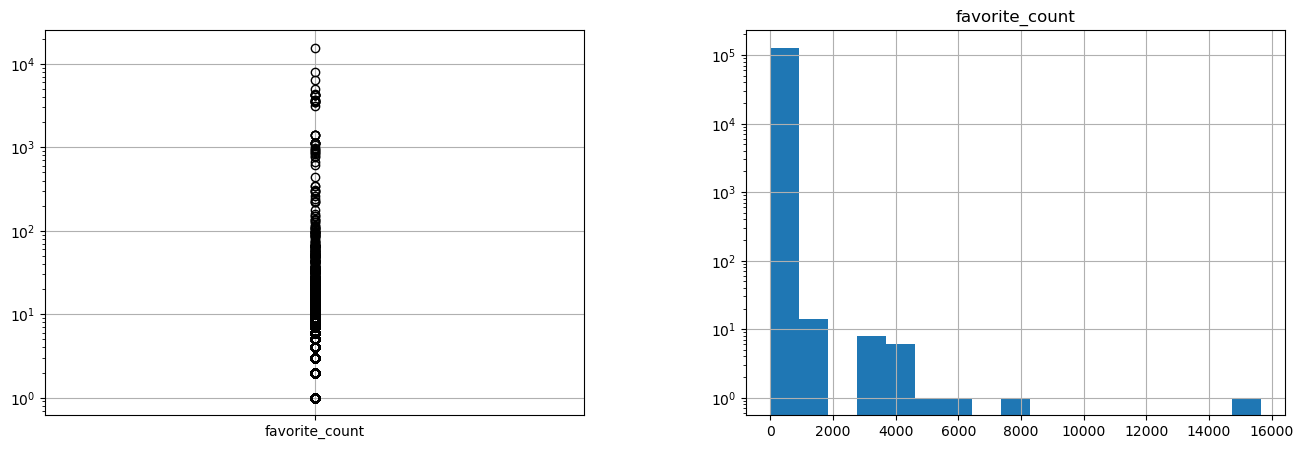

In [198]:
max_likes = 7*(10**6)
df_tweets_sample.favorite_count = df_tweets_sample.favorite_count.apply(
    lambda x: x if not pd.isna(x) and x < max_likes and x >= 0 else pd.NA)
df_tweets_sample.favorite_count = df_tweets_sample.favorite_count.astype("Int64")

# Then we display the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="favorite_count", ax=ax1)
ax1.set_yscale('log')
df_tweets_sample.hist(column="favorite_count", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.favorite_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

**'num_hashtags'**, since the max char in a tweet is 280, we decided to replace with the median number of hashtags everything that is above that threshold

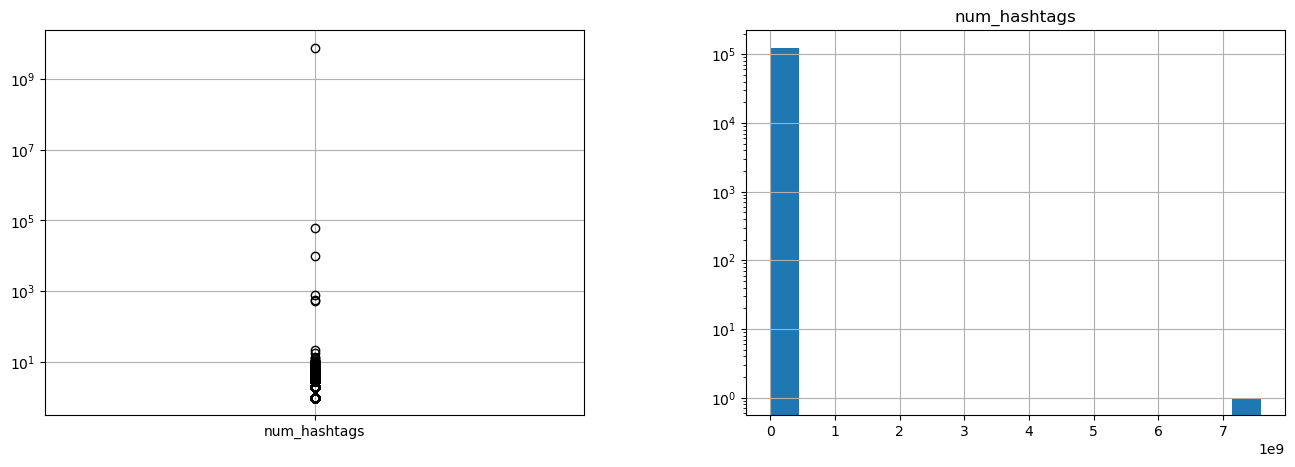

In [199]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="num_hashtags", ax=ax1)
ax1.set_yscale('log')
df_tweets_sample.hist(column="num_hashtags", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.num_hashtags.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

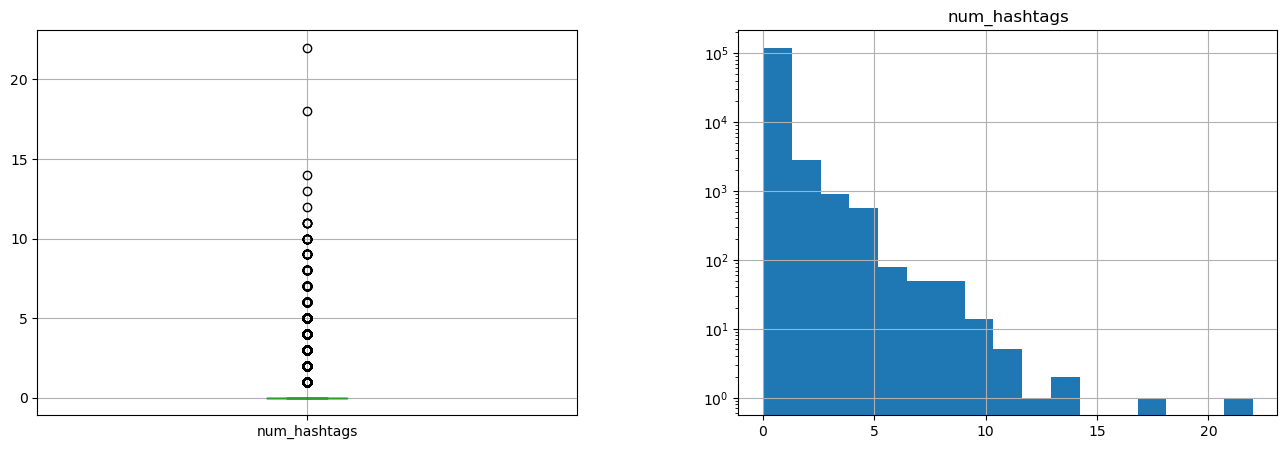

In [200]:
max_num_hashtags = 280
df_tweets_sample.num_hashtags = df_tweets_sample.num_hashtags.apply(
    lambda x: x if not pd.isna(x) and x < max_num_hashtags else pd.NA)
df_tweets_sample.num_hashtags = df_tweets_sample.num_hashtags.astype("Int64")

# Then we display the boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="num_hashtags", ax=ax1)
#ax1.set_yscale('log')
df_tweets_sample.hist(column="num_hashtags", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.num_hashtags.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

**'num_mentions'** since the max char in a tweet is 280, and since a mention to a user needs a @ before the user's nickname (which could be just a letter) we decided to replace with the median number of hashtags everything that is above 280/2.

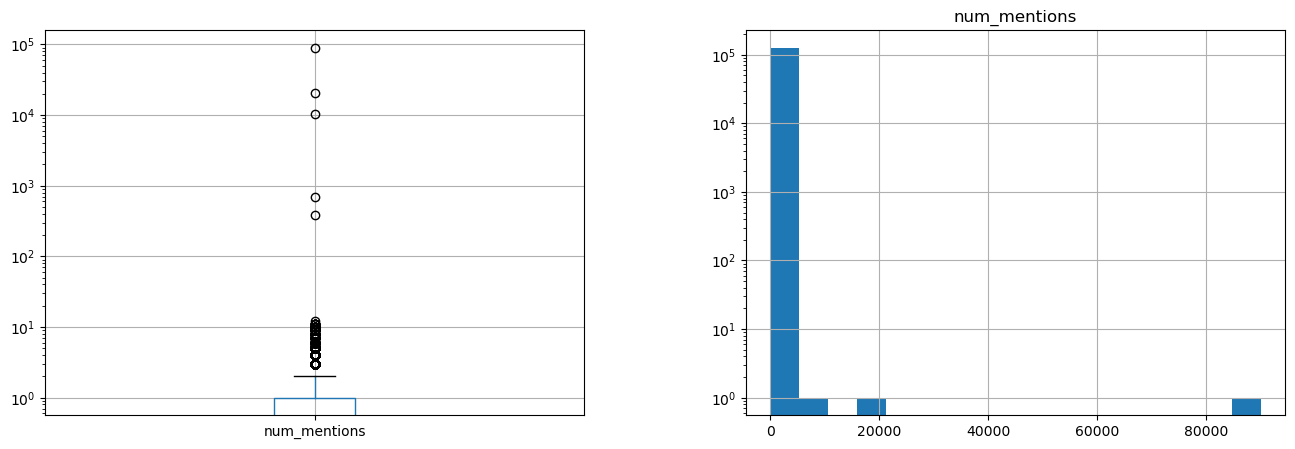

In [201]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="num_mentions", ax=ax1)
ax1.set_yscale('log')
df_tweets_sample.hist(column="num_mentions", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.num_mentions.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

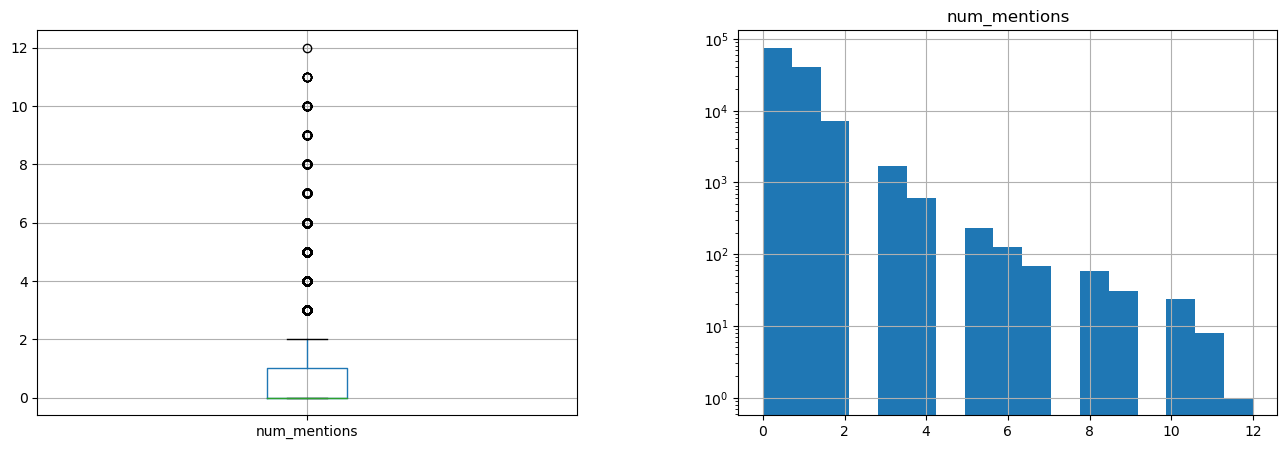

In [202]:
max_num_mentions = 140
df_tweets_sample.num_mentions = df_tweets_sample.num_mentions.apply(
    lambda x: x if not pd.isna(x) and x < max_num_mentions and x >= 0 else pd.NA)
df_tweets_sample.num_mentions = df_tweets_sample.num_mentions.astype("Int64")

# Then we display the boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="num_mentions", ax=ax1)
#ax1.set_yscale('log')
df_tweets_sample.hist(column="num_mentions", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets_sample.num_mentions.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

'created_at' since Twitter was founded in 2006 and we are in 2022, when we will analyze the years we will consider only the ones between 2006 and 2020

## Preliminary cleaning

Drop tweets where user_id is NaN. Tweets that clearly cannot be associated to any user do not contain useful info for further steps.

In [203]:
df_tweets_sample.dropna(subset=['user_id'], how='any', inplace=True)

Drop name column in user Dataframe. It is not useful information to our purpuse.

In [204]:
df_users.drop(columns=['name'], inplace=True)

## Manage duplicates

Before we manage the duplicates, we firsly view the heatmap of users and tweets:

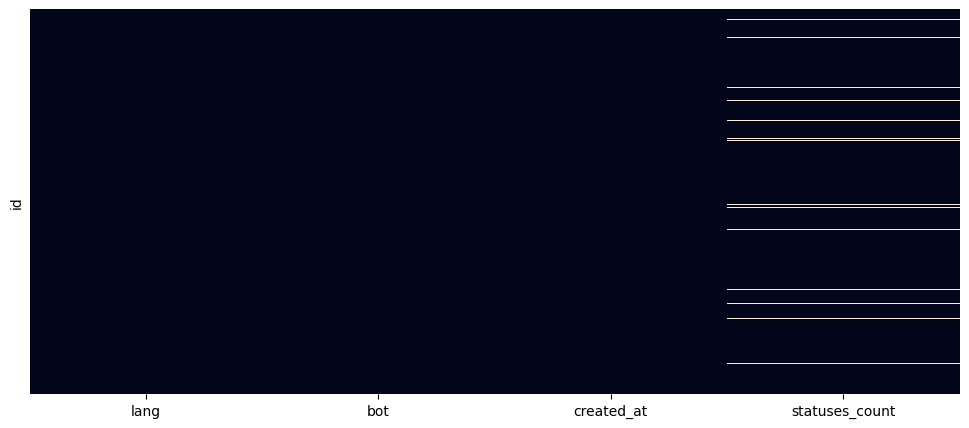

In [205]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_users.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

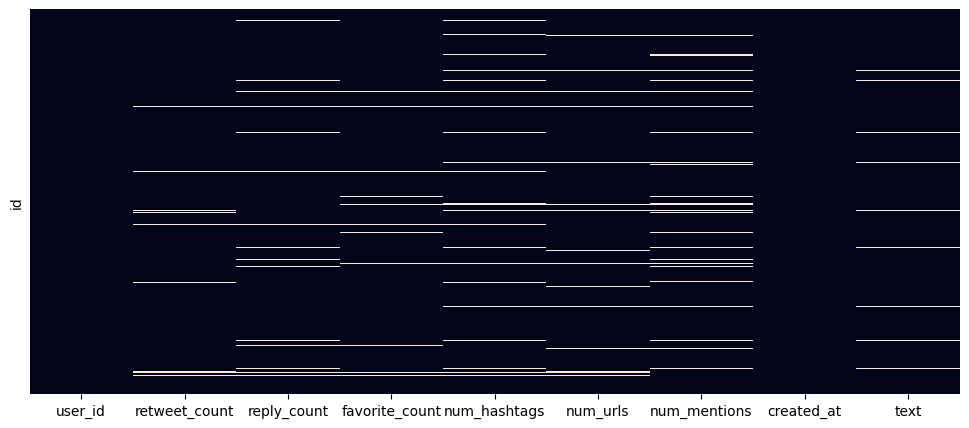

In [206]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets_sample.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

### User Dataframe
Drop full row duplicates

In [207]:
df_users.drop_duplicates(inplace=True)

See if there are duplicate users with different NaN attributes, in order to recover missing ones from the clone

In [210]:


df_users_duplicates = df_users.copy()

# Set index (id tweet) as Dataframe column
df_users_duplicates.reset_index(inplace=True)

# Find users with duplicate id
df_users_duplicates_check = df_users_duplicates.duplicated(["id"])

# Select ["id"] that have clones (to recover missing values)
df_users_duplicates_2 = df_users_duplicates[df_users_duplicates_check].copy()
df_users_duplicates_R = df_users_duplicates_2[["id"]].copy()

# Right Join to select them
df_users_merge = df_users_duplicates.merge(df_users_duplicates_R, on=["id"], how="right")

df_users_merge.dropna(subset=['id'], inplace=True)
df_users_merge.sort_values(["id"])

df_users.reset_index(inplace=True)
df_users.drop_duplicates(subset='id', inplace=True)
df_users.set_index('id', inplace=True)

In [211]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11505 entries, 2353593986 to 933183398
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lang            11505 non-null  string        
 1   bot             11505 non-null  bool          
 2   created_at      11505 non-null  datetime64[ns]
 3   statuses_count  11106 non-null  Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), string(1)
memory usage: 382.0 KB


### Tweets Dataframe
Drop full row duplicates


In [212]:
df_tweets_sample.drop_duplicates(inplace=True)

See if there are duplicate tweets with different NaN attributes, in order to recover missing ones from the clone

In [213]:
df_tweets_duplicates = df_tweets_sample.copy()
# Set index (id tweet) as Dataframe column
df_tweets_duplicates.reset_index(inplace=True)

# Find duplicates on tweet id and user_id features
df_tweets_duplicates_check = df_tweets_duplicates.duplicated(["id", "user_id"]).copy()

# Select ["id", "user_id"] that have clones
df_tweets_duplicates_2 = df_tweets_duplicates[df_tweets_duplicates_check].copy()
df_tweets_duplicates_R = df_tweets_duplicates_2[["id", "user_id"]].copy()

# Right join to select them
df_tweets_merge = df_tweets_duplicates.merge(df_tweets_duplicates_R,on=["id","user_id"],how="right")

df_tweets_merge.dropna(subset=['user_id'], inplace=True)
df_tweets_merge.sort_values(["id", "user_id"])

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text


In [ ]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13230783 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         Int64         
 1   retweet_count   Int64         
 2   reply_count     Int64         
 3   favorite_count  Int64         
 4   num_hashtags    Int64         
 5   num_urls        Int64         
 6   num_mentions    Int64         
 7   created_at      datetime64[ns]
 8   text            string        
dtypes: Int64(7), datetime64[ns](1), string(1)
memory usage: 1.1+ GB


We now see the heatmap of user and tweets without duplicates:

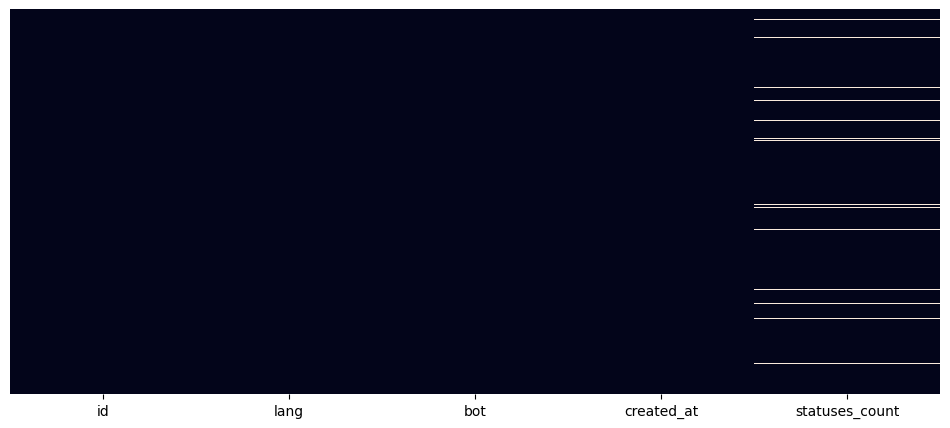

In [ ]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_users.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

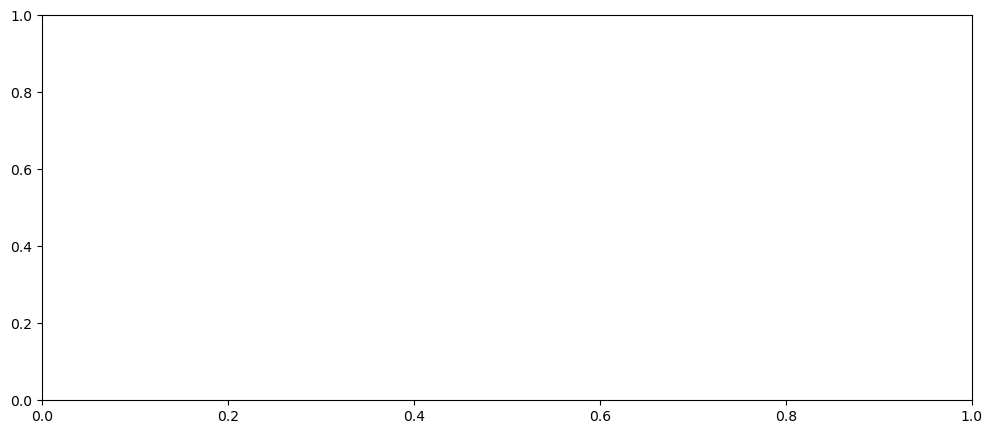

In [ ]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets_sample.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

## Manage NaN before joining tables

Better do before join in order to work only on Users Dataframe which is significantly smaller

As statuses_count in df_users contains only tweet count and not replies, while df_tweets contains also replies, we cannot estimate NaN statuses_count with the number of the users tweets, so we fill those NaNs with median of bot and median of not-bot users

In [215]:
def subsititute_with_median_user(row, bot_median, not_bot_median):
    if pd.isnull(row.statuses_count):
        if row['bot'] == True:
            row.statuses_count = bot_median
        else:
            row.statuses_count = not_bot_median
    return row

In [216]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11505 entries, 2353593986 to 933183398
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lang            11505 non-null  string        
 1   bot             11505 non-null  bool          
 2   created_at      11505 non-null  datetime64[ns]
 3   statuses_count  11106 non-null  Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), string(1)
memory usage: 382.0 KB


In [217]:
# Statuses_count median for bot and not-bot users
bot_median = df_users.loc[df_users['bot'] == True].statuses_count.median().astype(np.int64)
not_bot_median = df_users.loc[df_users['bot'] == False].statuses_count.median().astype(np.int64)
print('bot median statuses_count:', bot_median)
print('not bot median statuses_count:', not_bot_median)

# Apply substitution
df_users = df_users.apply(func=subsititute_with_median_user, axis=1, args=(bot_median, not_bot_median))

bot median statuses_count: 53
not bot median statuses_count: 2041


In [218]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11505 entries, 2353593986 to 933183398
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lang            11505 non-null  object        
 1   bot             11505 non-null  bool          
 2   created_at      11505 non-null  datetime64[ns]
 3   statuses_count  11505 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 370.8+ KB


## Joining tables
Joining the tables to make sure we work only on the user into the user DB

In [219]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132075 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         132075 non-null  Int64         
 1   retweet_count   126914 non-null  Int64         
 2   reply_count     125460 non-null  Int64         
 3   favorite_count  125530 non-null  Int64         
 4   num_hashtags    122917 non-null  Int64         
 5   num_urls        125494 non-null  Int64         
 6   num_mentions    124176 non-null  Int64         
 7   created_at      132075 non-null  datetime64[ns]
 8   text            127862 non-null  string        
dtypes: Int64(7), datetime64[ns](1), string(1)
memory usage: 11.0+ MB


In [220]:
# Set index (id tweet) as column of the Dataframe
df_users_with_index = df_users.reset_index()
df_users_with_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11505 entries, 0 to 11504
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              11505 non-null  int64         
 1   lang            11505 non-null  object        
 2   bot             11505 non-null  bool          
 3   created_at      11505 non-null  datetime64[ns]
 4   statuses_count  11505 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 370.9+ KB


In [221]:
# Join
df_joined = df_tweets_sample.merge(df_users_with_index, left_on='user_id', right_on="id", how='inner', suffixes=('_tweet', '_user'))

In [222]:
df_joined.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at_tweet,text,id,lang,bot,created_at_user,statuses_count
0,30759478,1,0,<NA>,0,0,<NA>,2020-04-22 20:32:39,true michelle rodriguez made a good point that...,30759478,en,False,2014-04-15 00:26:15,69057
1,30759478,0,0,0,0,0,0,2020-04-26 04:12:24,you know what i miss having in my room? my des...,30759478,en,False,2014-04-15 00:26:15,69057
2,30759478,0,0,1,0,0,2,2020-04-25 01:46:21,@Iuplns @bahorels I love this girl. this is fa...,30759478,en,False,2014-04-15 00:26:15,69057
3,30759478,0,0,1,0,0,1,2020-03-31 16:05:20,@peggyVEVO it definitely would've been!! haha,30759478,en,False,2014-04-15 00:26:15,69057
4,30759478,0,0,0,0,0,0,2020-04-13 15:10:26,i'm already all packed go me,30759478,en,False,2014-04-15 00:26:15,69057


## Manage NaN after joining tables

### Tweets Manage NaN
Fill the NaN in the numeric columns

Create Dataframe with count of valid (== non-null) numeric tweet attributes grouped by users

In [223]:
df_grouped_by_user_num_valid = df_joined.groupby(['user_id']).count().iloc[:, 0 : 6]


Create Dataframe with median value of numeric tweet attributes grouped by users

In [224]:
df_grouped_by_user_median = df_joined.groupby(['user_id']).median().iloc[:, 0 : 6]

Define substitute function that replace NaN features with user tweets median or with bot/not-bot median if not enough valid tweet features for that user

In [225]:
def subsititute_with_median_tweet(row, col_name, bot_median, not_bot_median, min_valid_user_values):
    if pd.isnull(row[col_name]):
        user_feature_num_valid = df_grouped_by_user_num_valid.loc[df_grouped_by_user_num_valid.index == row.user_id][col_name]
        if user_feature_num_valid.count() > min_valid_user_values:

            user_feature_median = df_grouped_by_user_median.loc[df_grouped_by_user_median.index == row.user_id][col_name]
            # If there are at least a min number of user tweets with valid attribute
            if not pd.isna(user_feature_median):
                # Use median of attribute of same user tweets
                row[col_name] = user_feature_median.astype(np.int64)
            elif row['bot'] == True:
                row[col_name] = bot_median
            else:
                row[col_name] = not_bot_median
            # Else use median of bot/not_bot
        elif row['bot'] == True:
            row[col_name] = bot_median
        else:
            row[col_name] = not_bot_median
    return row

In [226]:
# Minimum value of other tweets with not-NaN feature
min_valid_user_values = 4 #da calcolare eventualmente

for col_name in df_joined.iloc[:, 1 : 7]:
    # Calculate median on the feature for bots and not-bots
    bot_median = df_joined.loc[df_joined['bot'] == True][col_name].median().astype(np.int64)
    not_bot_median = df_joined.loc[df_joined['bot'] == False][col_name].median().astype(np.int64)
    print('bot median {}:'.format(col_name), bot_median)
    print('not bot median {}:'.format(col_name), not_bot_median)

    df_joined.apply(
        func=subsititute_with_median_tweet, axis=1, args=(
            col_name, bot_median, not_bot_median, min_valid_user_values))

bot median retweet_count: 0
not bot median retweet_count: 0
bot median reply_count: 0
not bot median reply_count: 0
bot median favorite_count: 0
not bot median favorite_count: 0
bot median num_hashtags: 0
not bot median num_hashtags: 0
bot median num_urls: 0
not bot median num_urls: 0
bot median num_mentions: 0
not bot median num_mentions: 1


Substitute all NaN 'text' strings with "", the void string

In [227]:
df_joined.text.fillna(value="", inplace=True)

In [228]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10558 entries, 0 to 10557
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           10558 non-null  Int64         
 1   retweet_count     10204 non-null  Int64         
 2   reply_count       10146 non-null  Int64         
 3   favorite_count    10126 non-null  Int64         
 4   num_hashtags      9962 non-null   Int64         
 5   num_urls          10139 non-null  Int64         
 6   num_mentions      10048 non-null  Int64         
 7   created_at_tweet  10558 non-null  datetime64[ns]
 8   text              10558 non-null  string        
 9   id                10558 non-null  int64         
 10  lang              10558 non-null  object        
 11  bot               10558 non-null  bool          
 12  created_at_user   10558 non-null  datetime64[ns]
 13  statuses_count    10558 non-null  int64         
dtypes: Int64(7), bool(1), 

## Correlation matrix
Now we see the correlation matrix to spot if there are any significant correlations between the attributes in the sample:

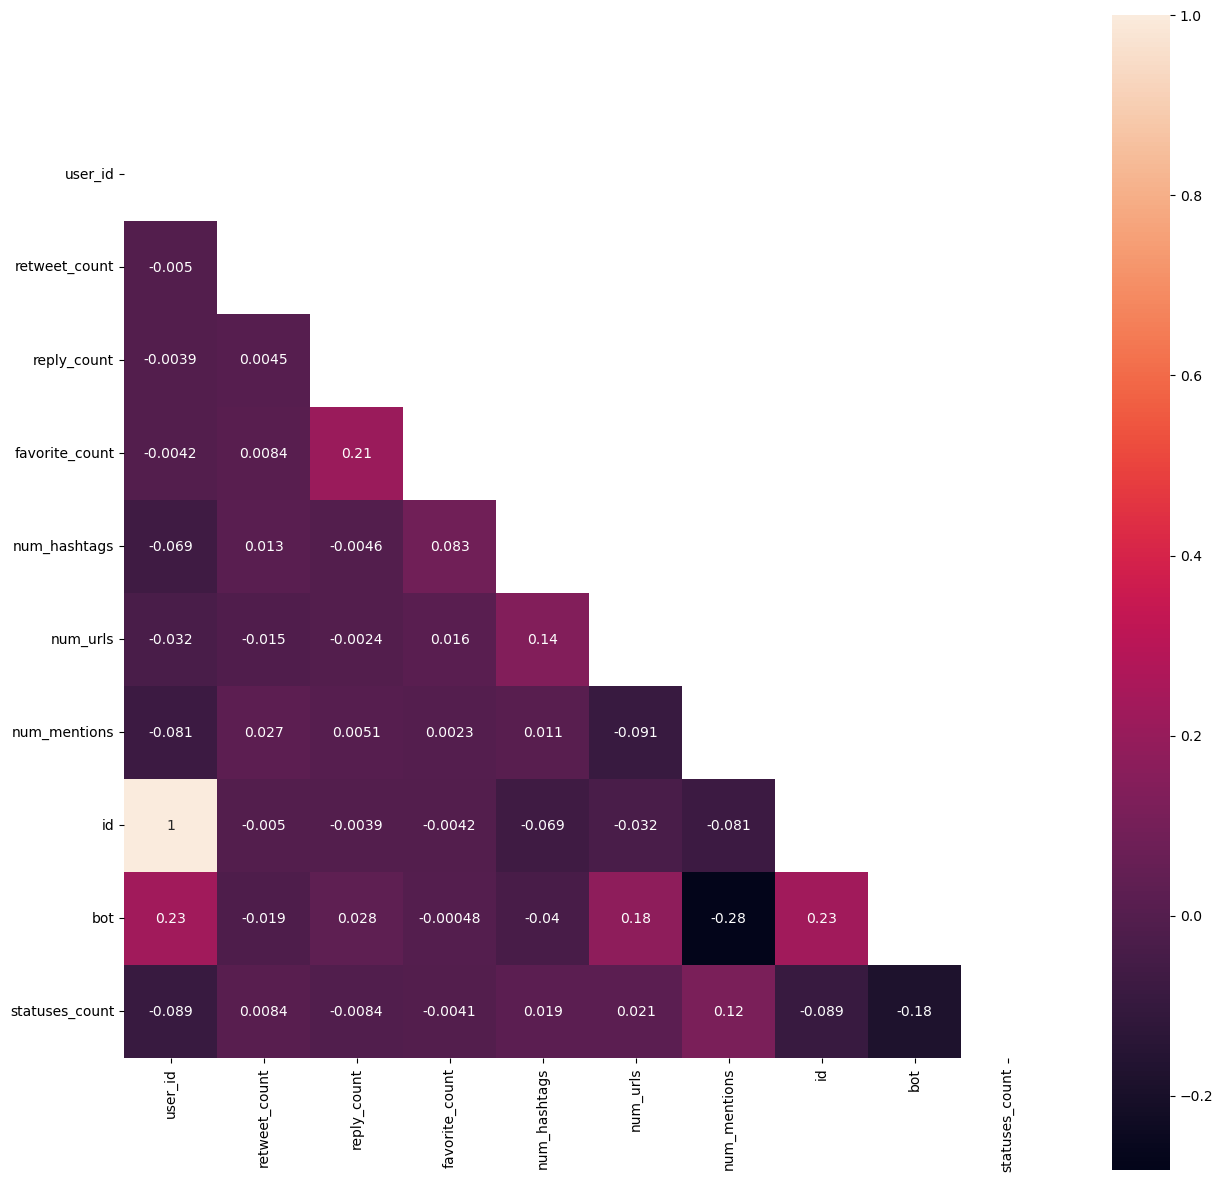

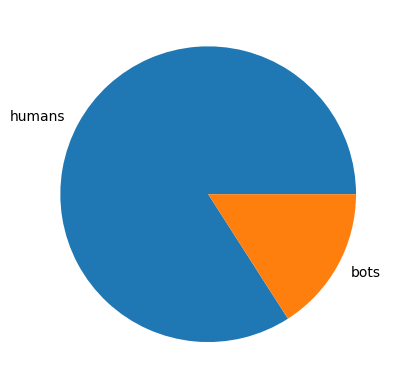

In [229]:
corr_matrix = df_joined.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()


label= ['humans', 'bots']
plt.pie(df_joined['bot'].value_counts(), labels=label)
plt.show()

### Save cleaned joined matrix

In [230]:
df_joined.to_csv("../dataset/cleaned_joined_tweets.csv")